## Creating CNN Using Scratch And Transfer Learning

Please download the dataset from the below url

In [68]:
##!mkdir ~/.kaggle

In [69]:
##!cp /kaggle.json ~/.kaggle/

In [70]:
##!chmod 600 ~/.kaggle/kaggle.json

In [71]:
##! pip install kaggle

In [72]:
#!pip install keras-tuner

In [73]:
#!kaggle datasets download -d iarunava/cell-images-for-detecting-malaria

In [74]:
#! unzip /content/cell-images-for-detecting-malaria.zip

In [75]:
#! unzip /content/cell_images/Dataset.zip

In [76]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [77]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/Dataset/Train'
valid_path = '/content/Dataset/Test'


In [78]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

mobilnet = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [79]:
# don't train existing weights
for layer in mobilnet.layers:
    layer.trainable = False

In [80]:
  # useful for getting number of output classes
folders = glob('Dataset/Train/*')

In [81]:
folders

['Dataset/Train/Parasite', 'Dataset/Train/Uninfected']

In [82]:
# our layers - you can add more if you want
x = Flatten()(mobilnet.output)

In [83]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=mobilnet.input, outputs=prediction)

In [84]:

# view the structure of the model
model.summary()


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [85]:
from tensorflow.keras.layers import MaxPooling2D

In [86]:
### Create Model from scratch using CNN
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 56, 56, 64)        8256      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 50176)            

In [87]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [88]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [89]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [90]:
training_set

In [91]:
test_set = test_datagen.flow_from_directory('Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [92]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
13/13 [==============================] - 6s 427ms/step - loss: 1.2411 - accuracy: 0.5481 - val_loss: 0.7302 - val_accuracy: 0.4179
Epoch 2/50
13/13 [==============================] - 5s 413ms/step - loss: 0.6043 - accuracy: 0.6587 - val_loss: 0.7617 - val_accuracy: 0.3955
Epoch 3/50
13/13 [==============================] - 5s 410ms/step - loss: 0.5451 - accuracy: 0.7019 - val_loss: 0.7668 - val_accuracy: 0.4179
Epoch 4/50
13/13 [==============================] - 5s 410ms/step - loss: 0.5028 - accuracy: 0.7067 - val_loss: 0.8559 - val_accuracy: 0.3507
Epoch 5/50
13/13 [==============================] - 5s 414ms/step - loss: 0.4906 - accuracy: 0.7500 - val_loss: 0.8408 - val_accuracy: 0.4104
Epoch 6/50
13/13 [==============================] - 5s 410ms/step - loss: 0.4766 - accuracy: 0.7668 - val_loss: 0.6177 - val_accuracy: 0.6269
Epoch 7/50
13/13 [==============================] - 5s 414ms/step - loss: 0.4192 - accuracy: 0.8101 - val_loss: 0.9149 - val_accuracy: 0.4328
Epoch 

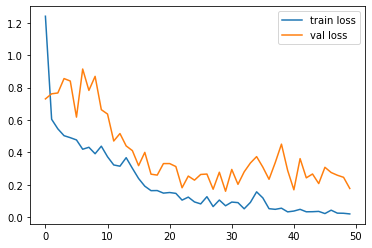

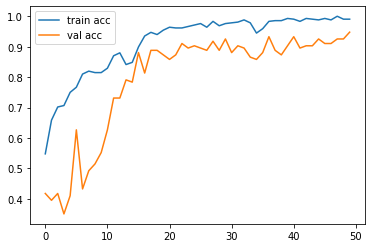

<Figure size 432x288 with 0 Axes>

In [93]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [94]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

In [95]:

y_pred = model.predict(test_set)


In [96]:
y_pred

array([[9.99999881e-01, 6.84273118e-08],
       [9.70415473e-01, 2.95845829e-02],
       [9.96181250e-01, 3.81882722e-03],
       [4.84740827e-03, 9.95152593e-01],
       [2.00936571e-03, 9.97990608e-01],
       [1.00000000e+00, 2.27834696e-11],
       [9.99999762e-01, 2.37180956e-07],
       [5.47700375e-02, 9.45230007e-01],
       [1.00000000e+00, 7.76857708e-15],
       [6.81732520e-02, 9.31826711e-01],
       [1.62568279e-02, 9.83743131e-01],
       [1.00000000e+00, 7.76235181e-16],
       [2.43268404e-02, 9.75673199e-01],
       [1.64873861e-02, 9.83512580e-01],
       [5.76882809e-03, 9.94231224e-01],
       [1.00000000e+00, 4.95058161e-10],
       [2.11049393e-02, 9.78895068e-01],
       [9.99985456e-01, 1.45294080e-05],
       [1.67735722e-02, 9.83226478e-01],
       [3.39924428e-03, 9.96600807e-01],
       [7.34494301e-03, 9.92655039e-01],
       [7.31937587e-01, 2.68062443e-01],
       [3.19898216e-04, 9.99680161e-01],
       [1.00000000e+00, 1.68621545e-17],
       [9.999995

In [97]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [98]:
y_pred

array([0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0])

In [99]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [100]:
model=load_model('model_vgg19.h5')

In [101]:
img=image.load_img('/content/Dataset/Test/Parasite/C39P4thinF_original_IMG_20150622_105554_cell_17.png',target_size=(224,224))



In [102]:
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [103]:
x.shape

(224, 224, 3)

In [104]:
x=x/255

In [105]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [106]:
model.predict(img_data)

array([[0., 1.]], dtype=float32)

In [107]:
a=np.argmax(model.predict(img_data), axis=1)

In [108]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Uninfected


In [109]:
!nvidia-smi

Mon Nov  1 06:35:15 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.29.05    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P0    60W / 149W |   2301MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------